In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path_coverage = 'tme_data/sets/v2_maze_2/coverage'
path_distances = 'tme_data/sets/v2_maze_2/distances'

In [3]:
os.chdir(path_coverage)

In [4]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return f.read()

In [5]:
matrix_greedy = []
matrix_minPos = []
matrix_combined = []
matrix_nearest = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('greedy' in file_path):
            matrix_greedy.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_minPos.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_combined.append(np.loadtxt(file_path))
        if('nearest' in file_path):
            matrix_nearest.append(np.loadtxt(file_path))

np_matrix_greedy = np.array(matrix_greedy)
np_matrix_minPos = np.array(matrix_minPos)
np_matrix_combined = np.array(matrix_combined)
np_matrix_nearest = np.array(matrix_nearest)
print(np_matrix_greedy.shape)
print(np_matrix_minPos.shape)
print(np_matrix_combined.shape)
print(np_matrix_nearest.shape)

(30,)
(27,)
(20,)
(28,)


In [6]:
os.chdir('../distances')

matrix_distance_greedy = []
matrix_distance_minPos = []
matrix_distance_combined = []
matrix_distance_nearest = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('greedy' in file_path):
            matrix_distance_greedy.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_distance_minPos.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_distance_combined.append(np.loadtxt(file_path))
        if('nearest' in file_path):
            matrix_distance_nearest.append(np.loadtxt(file_path))

matrix_distance_greedy = np.array(matrix_distance_greedy)
matrix_distance_minPos = np.array(matrix_distance_minPos)
matrix_distance_combined = np.array(matrix_distance_combined)
matrix_distance_nearest = np.array(matrix_distance_nearest)
print(matrix_distance_greedy.shape)
print(matrix_distance_minPos.shape)
print(matrix_distance_combined.shape)
print(matrix_distance_nearest.shape)

(30,)
(27,)
(20,)
(28,)


In [7]:
def neg_eighty_check(matrix):
    result = True
    if(matrix.shape[0] == 80):
        result = False
    return result

In [8]:
def eighty_build(matrix):
    result = matrix
    if (neg_eighty_check(matrix)):
        number = 80-matrix.shape[0]
        temp_2 = np.full(number, matrix[-1])
        result = np.insert(result, -1, temp_2)
    return result

In [9]:
def eighty_build_distance(matrix):
    result = matrix
    if (neg_eighty_check(matrix)):
        number = 80-matrix.shape[0]
        #temp_2 = np.full((number, 4), matrix[-1][:])
        #temp_2 = np.repeat(matrix[-1], number, axis=0)
        temp_2 = np.tile(matrix[-1], (number, 1))
        result = np.append(result, temp_2)
        result = result.reshape((80, -1))
    return result

In [51]:
def matrix_builder(matrix, distance_matrix):
    temp = []
    for i in range(80):
        temp.append(i*5)
    temp = np.array(temp)
    result = eighty_build(matrix[0][:, 1])
    result = np.c_[temp, result]
    result_2 = np.array(temp)
    result_2 = eighty_build_distance(distance_matrix[0][:,1:])
    result_2 = np.c_[temp, result_2]
    for i in range(len(matrix) - 1):
        temp = matrix[i+1][:, 1]
        temp = eighty_build(temp)
        temp_2 = distance_matrix[i+1][:,1:]
        temp_2 = eighty_build_distance(temp_2)
        if (temp[-1] > 0.90):
            result = np.c_[result, temp]
            result_2 = np.c_[result_2, temp_2]
    return result, result_2

In [52]:
def matrix_splice(matrix, length):
    result_distance = matrix[:, 0:]
    result_count = matrix[:, 0:]
    result_distance_sum = matrix[:, 0:]
    result_count_sum = matrix[:, 0:]

    temp = matrix[:, 1:]
    length = int(len(temp) / length*2)

    for i in range(length):
        temp_distance = temp[:, 0:length-1]
        temp_count = temp[:, length:length*2-1]
        temp_distance_sum = np.sum(temp_distance, axis=1)
        temp_count_sum = np.sum(temp_count, axis=1)
        result_distance=np.c_[result_distance, temp_distance]
        result_count=np.c_[result_count, temp_count]
        result_distance_sum = np.c_[result_distance_sum, temp_distance_sum]
        result_count_sum = np.c_[result_count_sum, temp_count_sum]
        temp = matrix[:, length*2-1:]

    return result_distance, result_count, result_distance_sum, result_count_sum

In [53]:
nearest_plottable, nearest_distance_plottable = matrix_builder(np_matrix_nearest[1:], matrix_distance_nearest[1:])
greedy_plottable, greedy_distance_plottable = matrix_builder(np_matrix_greedy[1:], matrix_distance_greedy[1:])
minPos_plottable, minPos_distance_plottable = matrix_builder(np_matrix_minPos[1:], matrix_distance_minPos[1:])
combined_plottable, combined_distance_plottable = matrix_builder(np_matrix_combined[1:], matrix_distance_combined[1:])

In [54]:
print(nearest_plottable.shape)
print(greedy_plottable.shape)
print(minPos_plottable.shape)
print(combined_plottable.shape)
print(nearest_distance_plottable.shape)
print(greedy_distance_plottable.shape)
print(minPos_distance_plottable.shape)
print(combined_distance_plottable.shape)

(80, 12)
(80, 18)
(80, 17)
(80, 17)
(80, 45)
(80, 69)
(80, 65)
(80, 65)


In [55]:
nearest_mean = np.mean(nearest_plottable[:,1:-1], axis=1)
greedy_mean = np.mean(greedy_plottable[:,1:-1], axis=1)
minPos_mean = np.mean(minPos_plottable[:,1:-1], axis=1)
combined_mean = np.mean(combined_plottable[:,1:-1], axis=1)

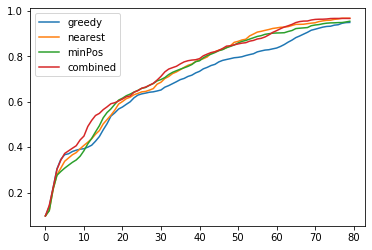

In [56]:
plt.plot(greedy_mean, label='greedy')
plt.plot(nearest_mean, label='nearest')
plt.plot(minPos_mean, label='minPos')
plt.plot(combined_mean, label='combined')
plt.legend()
plt.show()

In [57]:
graph = greedy_plottable
greedy_min = np.min(graph[:,1:-1], axis=1)
greedy_overall_min = greedy_min[-1]
greedy_max = np.max(graph[:,1:-1], axis=1)
greedy_overall_max = greedy_max[-1]
graph = nearest_plottable
nearest_min = np.min(graph[:,1:-1], axis=1)
nearest_overall_min = nearest_min[-1]
nearest_max = np.max(graph[:,1:-1], axis=1)
nearest_overall_max = nearest_max[-1]
graph = minPos_plottable
minPos_min = np.min(graph[:,1:-1], axis=1)
minPos_overall_min = minPos_min[-1]
minPos_max = np.max(graph[:,1:-1], axis=1)
minPos_overall_max = minPos_max[-1]
graph = combined_plottable
combined_min = np.min(graph[:,1:-1], axis=1)
combined_overall_min = combined_min[-1]
combined_max = np.max(graph[:,1:-1], axis=1)
combined_overall_max = combined_max[-1]

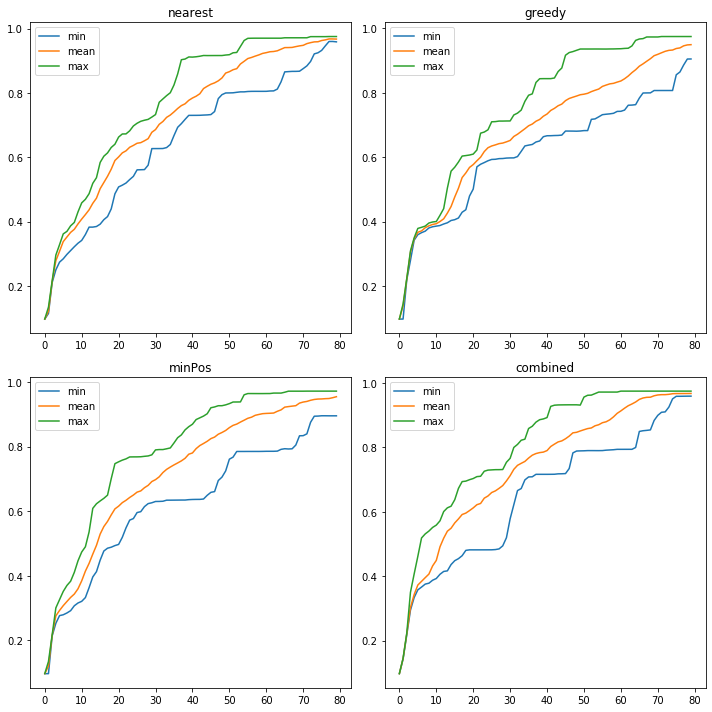

In [58]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_min, label='min')
ax1.plot(nearest_mean, label='mean')
ax1.plot(nearest_max, label='max')
ax1.legend()
ax1.set_title('nearest')
ax2.plot(greedy_min, label='min')
ax2.plot(greedy_mean, label='mean')
ax2.plot(greedy_max, label='max')
ax2.legend()
ax2.set_title('greedy')
ax3.plot(minPos_min, label='min')
ax3.plot(minPos_mean, label='mean')
ax3.plot(minPos_max, label='max')
ax3.legend()
ax3.set_title('minPos')
ax4.plot(combined_min, label='min')
ax4.plot(combined_mean, label='mean')
ax4.plot(combined_max, label='max')
ax4.legend()
ax4.set_title('combined')
fig.set_size_inches(10, 10)
fig.tight_layout()

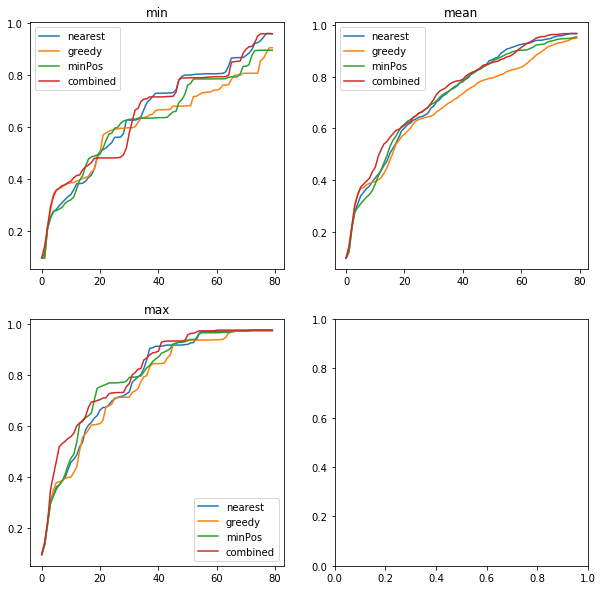

In [59]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_min, label='nearest')
ax1.plot(greedy_min, label='greedy')
ax1.plot(minPos_min, label='minPos')
ax1.plot(combined_min, label='combined')
ax1.legend()
ax1.set_title('min')
ax2.plot(nearest_mean, label='nearest')
ax2.plot(greedy_mean, label='greedy')
ax2.plot(minPos_mean, label='minPos')
ax2.plot(combined_mean, label='combined')
ax2.legend()
ax2.set_title('mean')
ax3.plot(nearest_max, label='nearest')
ax3.plot(greedy_max, label='greedy')
ax3.plot(minPos_max, label='minPos')
ax3.plot(combined_max, label='combined')
ax3.legend()
ax3.set_title('max')
fig.set_size_inches(10, 10)


In [60]:
nearest_distances, nearest_counting, nearest_distances_sum, nearest_counting_sum = matrix_splice(nearest_distance_plottable, 2)
greedy_distances, greedy_counting, greedy_distances_sum, greedy_counting_sum = matrix_splice(greedy_distance_plottable, 2)
minPos_distances, minPos_counting, minPos_distances_sum, minPos_counting_sum = matrix_splice(minPos_distance_plottable, 2)
combined_distances, combined_counting, combined_distances_sum, combined_counting_sum = matrix_splice(combined_distance_plottable, 2)
nearest_distances_sum_mean = np.mean(nearest_distances_sum[:, 1:-1], axis=1)
greedy_distances_sum_mean = np.mean(greedy_distances_sum[:, 1:-1], axis=1)
minPos_distances_sum_mean = np.mean(minPos_distances_sum[:, 1:-1], axis=1)
combined_distances_sum_mean = np.mean(combined_distances_sum[:, 1:-1], axis=1)
nearest_counting_sum_mean = np.mean(nearest_counting_sum[:, 1:-1], axis=1)
greedy_counting_sum_mean = np.mean(greedy_counting_sum[:, 1:-1], axis=1)
minPos_counting_sum_mean = np.mean(minPos_counting_sum[:, 1:-1], axis=1)
combined_counting_sum_mean = np.mean(combined_counting_sum[:, 1:-1], axis=1)
nearest_distances_mean = np.mean(nearest_distances[:, 1:-1], axis=1)
greedy_distances_mean = np.mean(greedy_distances[:, 1:-1], axis=1)
minPos_distances_mean = np.mean(minPos_distances[:, 1:-1], axis=1)
combined_distances_mean = np.mean(combined_distances[:, 1:-1], axis=1)
nearest_counting_mean = np.mean(nearest_counting[:, 1:-1], axis=1)
greedy_counting_mean = np.mean(greedy_counting[:, 1:-1], axis=1)
minPos_counting_mean = np.mean(minPos_counting[:, 1:-1], axis=1)
combined_counting_mean = np.mean(combined_counting[:, 1:-1], axis=1)

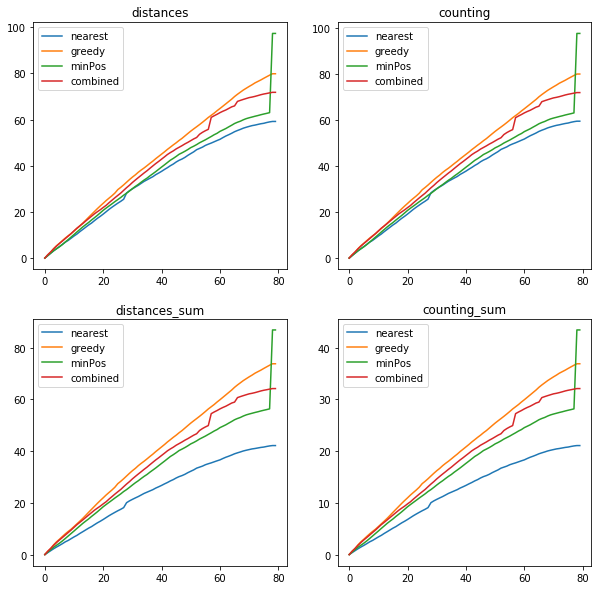

In [64]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(nearest_distances_mean, label='nearest')
ax1.plot(greedy_distances_mean, label='greedy')
ax1.plot(minPos_distances_mean, label='minPos')
ax1.plot(combined_distances_mean, label='combined')
ax1.legend()
ax1.set_title('distances')
ax2.plot(nearest_counting_mean, label='nearest')
ax2.plot(greedy_counting_mean, label='greedy')
ax2.plot(minPos_counting_mean, label='minPos')
ax2.plot(combined_counting_mean, label='combined')
ax2.legend()
ax2.set_title('counting')
ax3.plot(nearest_distances_sum_mean, label='nearest')
ax3.plot(greedy_distances_sum_mean, label='greedy')
ax3.plot(minPos_distances_sum_mean, label='minPos')
ax3.plot(combined_distances_sum_mean, label='combined')
ax3.legend()
ax3.set_title('distances_sum')
ax4.plot(nearest_counting_sum_mean, label='nearest')
ax4.plot(greedy_counting_sum_mean, label='greedy')
ax4.plot(minPos_counting_sum_mean, label='minPos')
ax4.plot(combined_counting_sum_mean, label='combined')
ax4.legend()
ax4.set_title('counting_sum')
fig.set_size_inches(10, 10)

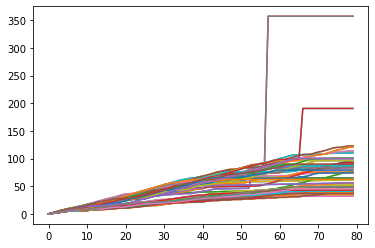

In [66]:
#outliers in minPos, nearest and combined
plt.plot(combined_distances[:,1:])
plt.show()

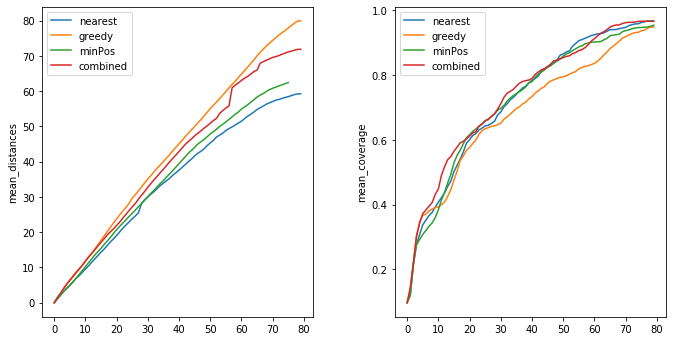

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(nearest_distances_mean, label='nearest')
ax1.plot(greedy_distances_mean, label='greedy')
ax1.plot(minPos_distances_mean[:-4], label='minPos')
ax1.plot(combined_distances_mean, label='combined')
ax1.set_ylabel('mean_distances')
ax1.legend()
ax2.plot(nearest_mean, label='nearest')
ax2.plot(greedy_mean, label='greedy')
ax2.plot(minPos_mean, label='minPos')
ax2.plot(combined_mean, label='combined')
ax2.set_ylabel('mean_coverage')
ax2.legend()
fig.tight_layout()
fig.set_size_inches(10, 5)
plt.show()

TODO:
  - plots for multiple robots
  - plots for different scenarios
  - plots with ratios of distance to coverage or sth similar